# Numerical Methods for Solving ODEs

Many ODEs that we deal with while modeling realistic conditions are non-linear and in many cases do not have an exact analytic solution. In this case we have to resort to numerical methods in order to get an approximate solution.

## Euler's Method

Euler's Method is the simplest numerical method for solving a first order (or a system of first order) ODEs. Suppose we have an ODE of the form $\frac{dx}{dt}=f(x(t);t)$. It starts from an initial point given by the initial conditions. Then, it propagates the solution forward with each timestep by calculating the slope at that point and drawing a line connecting that point to the next point. The slope is calculated by evaluating $f(x(t);t)$ at the specific point $x(t_n)$.

Suppose the initial time is $t_0$ and the final time is $t_n$. The timestep is $\Delta t=\frac{t_n-t_0}{n}$. We have:

\begin{equation}\label{eq:t_n}
    t_n = t_0+n\Delta t, 
\end{equation}

\begin{equation}\label{eq:x_0}
    x_0 = x(t_0).
\end{equation}

Now we taylor expand $x(t+\Delta t)$ and ignore orders higher than the first order since Euler's Method is a first order method.
\begin{equation}\label{eq:taylor_expansion_first_order}
    x(t+\Delta t) = x(t) + \frac{dx}{dt}\Delta t + \mathscr{O}({\Delta t}^2).
\end{equation}

Now we substitute $\frac{dx}{dt}=f(x(t);t)$ in \ref{eq:taylor_expansion_first_order} and discard the higher order terms to get the following:
\begin{equation}\label{eq:euler}
        x(t+\Delta t) = x(t) + f(x(t);t)\Delta t.
\end{equation}

### Implementing Euler's Method in a Computer

A computer cannot store a floating point number with arbitrary precision. Meaning, we can only store a subset of the real numbers exactly and any other number will be rounded up or down to the nearest so-called "Machine Numbers".

Euler's Method can be implemented in a computer in the following way:
\begin{equation}\label{eq:Euler_in_computer}
    x_{n + 1} = x_n + f(x_n;t_n)\Delta t.
\end{equation}

This is the Euler's Method. In the following section we will implement it in Python.



### Python Code

In order to implement Euler's Method in Python we need the following python libraries:

- Numpy for working with arrays
- MatPlotLib for plotting the solution

We start by importing these libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We want to solve the initial value problem below:
\begin{equation}\label{eq:initial_value_problem}
    \frac{d^2 x}{{dt}^2} = -x,
    \left\{
        \begin{array}{l}
            x(0) = 1 \\
            v(0) = 0
        \end{array}
     \right..
\end{equation}

First, we convert it into a system of first order ODEs:
\begin{equation}\label{eq:first_order_conversion}
    \left\{
        \begin{array}{l}
            \frac{dx}{dt} = v \\
            \frac{dv}{dt} = -x
        \end{array}
    \right..
\end{equation}

We can write \ref{eq:first_order_conversion} in matrix form:

\begin{equation}\label{eq:matrix_form}
    \begin{pmatrix}
        \frac{dx}{dt} \\
        \frac{dv}{dt}
    \end{pmatrix}
    =
    \begin{pmatrix}
        0 & 1 \\
        -1 & 0
    \end{pmatrix}
    \begin{pmatrix}
        x \\
        v
    \end{pmatrix},
\end{equation}

\begin{equation}\label{eq:compact_matrix_form}
    \frac{d\mathbf{y}}{dt} = \mathbf{L}\mathbf{y}.
\end{equation}

Using \ref{eq:Euler_in_computer} and \ref{eq:compact_matrix_form} we have:

\begin{equation}\label{eq:Euler_matrix_form}
    {\mathbf{y}}_{n + 1} = (\mathbf{I} + \Delta t\mathbf{L}){\mathbf{y}}_n.
\end{equation}

We are now ready to implement Euler's Method or any other numerical method for solving this ODE. However, Before we start we should take numerical stability into account which means that our numerical answer does not diverge at large $t$. In other words, our computation errors should not accumulate. Suppose that the round-off error at step $n$ is $e_{n}$. Then, we have:

\begin{equation}\label{eq:Euler_with_round_off_error}
    {\mathbf{y}}_{n + 1} + {\mathbf{e}}_{n + 1} = 
    (\mathbf{I} + \Delta t\mathbf{L})({\mathbf{y}}_n + {\mathbf{e}}_{n}).
\end{equation}

Generally, \ref{eq:Euler_with_round_off_error} can be written like the following:

\begin{equation}\label{eq:Euler_with_round_off_error_general}
    {\mathbf{y}}_{n + 1} + {\mathbf{e}}_{n + 1} = 
    \mathbf{T}({\mathbf{y}}_n + {\mathbf{e}}_{n}).
\end{equation}

Taylor expanding $\mathbf{T}$ and discarding the higher order terms will lead to the following:

\begin{equation}\label{eq:error_accumulation}
    {\mathbf{e}}_{n + 1} = \frac{d\mathbf{T}}
    {d\mathbf{y}_n}\mathbf{e}_n = \mathbf{G}\mathbf{e}_n.
\end{equation}

The only way for our errors not accumulating is if the absolute value of eigenvalues of $\mathbf{G}$ are less than or equal to one. In our example the absolute value of eigenvalues are $\sqrt{1 + {\Delta t}^2}$ so the solution is not numerically stable to calculate with Euler's Method. But we will proceed anyway in order to compare this method with other methods and demonstrating that our answer is not stable.

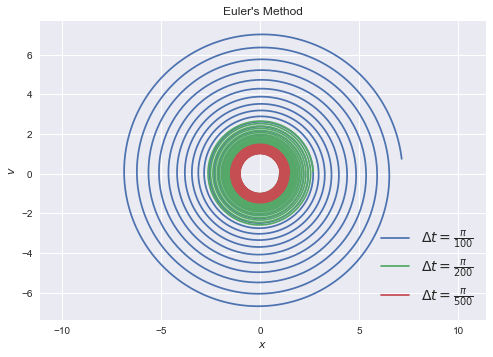

In [2]:
# SECTION 1: INITIALIZING THE VARIABLES
#------------------------------------------------------


# Initializing different timesteps in order to compare accuracies

initial_time = 0
final_time = 40 * np.pi
timestep_1 = np.pi / 100
timestep_2 = np.pi / 200
timestep_3 = np.pi / 500
t_1 = np.arange(initial_time, final_time, timestep_1)
t_2 = np.arange(initial_time, final_time, timestep_2)
t_3 = np.arange(initial_time, final_time, timestep_3)

y0 = (1, 0) # Initial condition y0 = (x0, v0)

# Initializing the array that we want to store our solutions in

y_1 = np.zeros((len(t_1) - 1, 2))
y_1[0][0], y_1[0][1] = y0[0], y0[1]
y_2 = np.zeros((len(t_2) - 1, 2))
y_2[0][0], y_2[0][1] = y0[0], y0[1]
y_3 = np.zeros((len(t_3) - 1, 2))
y_3[0][0], y_3[0][1] = y0[0], y0[1]

# SECTION 2: SETTING UP THE ODE AND IMPLEMENTING THE EULER'S METHOD
#------------------------------------------------------


for i in range(len(t_1) - 2):
    y_1[i + 1][0] = y_1[i][0] + timestep_1 * y_1[i][1]
    y_1[i + 1][1] = - timestep_1 * y_1[i][0] + y_1[i][1]
for i in range(len(t_2) - 2):
    y_2[i + 1][0] = y_2[i][0] + timestep_2 * y_2[i][1]
    y_2[i + 1][1] = - timestep_2 * y_2[i][0] + y_2[i][1]
for i in range(len(t_3) - 2):
    y_3[i + 1][0] = y_3[i][0] + timestep_3 * y_3[i][1]
    y_3[i + 1][1] = - timestep_3 * y_3[i][0] + y_3[i][1]

# SECTION 3: PLOTTING THE RESULT
#------------------------------------------------------


plt.style.use("seaborn")
plt.plot(y_1[:,0], y_1[:,1], label=r"$ \Delta t = \frac{\pi}{100} $")
plt.plot(y_2[:,0], y_2[:,1], label=r"$ \Delta t = \frac{\pi}{200} $")
plt.plot(y_3[:,0], y_3[:,1], label=r"$ \Delta t = \frac{\pi}{500} $")
plt.title("Euler's Method")
plt.axis("equal")
plt.xlabel(r"$ x $")
plt.ylabel(r"$ v $")
plt.legend(fontsize=14)
plt.show()

As you can see our solution is diverging very fast even with a timestep as small as $\frac{\pi}{500}$ so the Euler's Method is not good for this example. in the following sections we will discuss about other numerical methods for solving a system of first order ODEs.


## Euler-Cromer Method

Euler-Cromer Method is the same as Euler's Method, except that it uses the derivative at the next timestep instead of the current one. Meaning, for a second order ODE of the form $\frac{d^2 x}{{dt}^2} = f(x(t);t)$ we have:

\begin{equation}
    v_{n+1} = v_n + f(x_n;t_n)\Delta t,
\end{equation}

\begin{equation}\label{eq:Euler_Cromer_Algorithm}
    x_{n+1} = x_n + v_{n+1}\Delta t. 
\end{equation}

### Python Code

We will implement the Euler-Cromer Algorithm in the following code below:

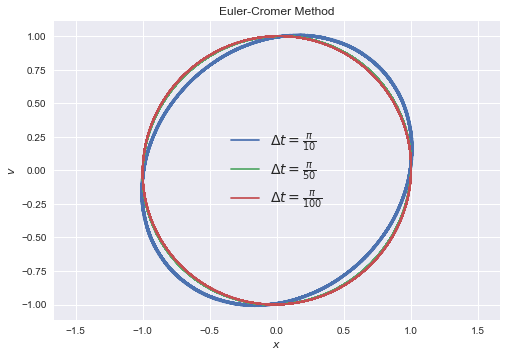

In [3]:
# SECTION 1: INITIALIZING THE VARIABLES
#------------------------------------------------------


# Initializing different timesteps in order to compare accuracies

initial_time = 0
final_time = 40 * np.pi
timestep_1 = np.pi / 10
timestep_2 = np.pi / 50
timestep_3 = np.pi / 100
t_1 = np.arange(initial_time, final_time, timestep_1)
t_2 = np.arange(initial_time, final_time, timestep_2)
t_3 = np.arange(initial_time, final_time, timestep_3)

y0 = (1, 0) # Initial condition y0 = (x0, v0)

# Initializing the array that we want to store our solutions in

y_1 = np.zeros((len(t_1) - 1, 2))
y_1[0][0], y_1[0][1] = y0[0], y0[1]
y_2 = np.zeros((len(t_2) - 1, 2))
y_2[0][0], y_2[0][1] = y0[0], y0[1]
y_3 = np.zeros((len(t_3) - 1, 2))
y_3[0][0], y_3[0][1] = y0[0], y0[1]

# SECTION 2: SETTING UP THE ODE AND IMPLEMENTING THE EULER-CROMER METHOD
#------------------------------------------------------


for i in range(len(t_1) - 2):
    y_1[i + 1][1] = - timestep_1 * y_1[i][0] + y_1[i][1]
    y_1[i + 1][0] = y_1[i][0] + timestep_1 * y_1[i + 1][1]
for i in range(len(t_2) - 2):
    y_2[i + 1][1] = - timestep_2 * y_2[i][0] + y_2[i][1]
    y_2[i + 1][0] = y_2[i][0] + timestep_2 * y_2[i + 1][1]
for i in range(len(t_3) - 2):
    y_3[i + 1][1] = - timestep_3 * y_3[i][0] + y_3[i][1]
    y_3[i + 1][0] = y_3[i][0] + timestep_3 * y_3[i + 1][1]
 
# SECTION 3: PLOTTING THE RESULT
#------------------------------------------------------


plt.style.use("seaborn")
plt.plot(y_1[:,0], y_1[:,1], label=r"$ \Delta t = \frac{\pi}{10} $")
plt.plot(y_2[:,0], y_2[:,1], label=r"$ \Delta t = \frac{\pi}{50} $")
plt.plot(y_3[:,0], y_3[:,1], label=r"$ \Delta t = \frac{\pi}{100} $")
plt.title("Euler-Cromer Method")
plt.axis("equal")
plt.xlabel(r"$ x $")
plt.ylabel(r"$ v $")
plt.legend(fontsize=14)
plt.show()

Our solution is much more stable now even though it was such a small modification. Even at a timestep as large as $\frac{\pi}{10}$ our solution did not diverge. However, it is deviating from the exact solution which is a perfect circle. The reason for deviation from the perfect circle is that it calculates $x(t)$ more accurately than $v(t)$. Reducing the timestep to $\frac{\pi}{50}$ increased our accuracy significantly and there is not much of a difference if we reduce it further.


## Midpoint Method

Midpoint Method, also known as Modified Euler's Method is the next improvement upon Euler's Method. Rather than calculating the slope at the start of each sub-interval $[t_n,t_{n+1}]$, it calculates the slope at the middle of the sub-interval. First, it finds $x_{n+1}$ by using Euler's Method. Then, it corrects the slope by taking the average slope.

\begin{equation}\label{eq:x_pred}
    \tilde{x}_{n+1} = x_n + f(x_n;t_n)\Delta t,
\end{equation}

\begin{equation}\label{eq:midpoint_method}
    x_{n+1} = x_n + \frac{1}{2}(f(x_n;t_n) + f(\tilde{x}_{n+1};t_n + \Delta t)).
\end{equation}

### Python Code

The libraries that we need are the same as before. Only the implementation of the algorithm is different.

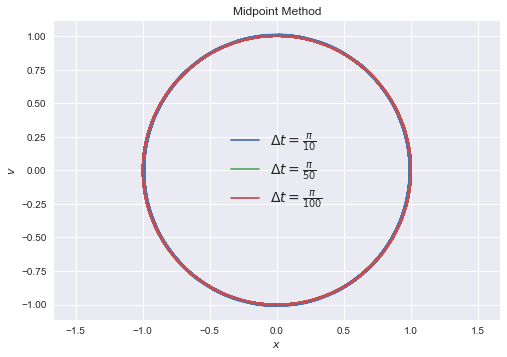

In [4]:
# SECTION 1: INITIALIZING THE VARIABLES
#------------------------------------------------------


# Initializing different timesteps in order to compare accuracies

initial_time = 0
final_time = 40 * np.pi
timestep_1 = np.pi / 10
timestep_2 = np.pi / 50
timestep_3 = np.pi / 100
t_1 = np.arange(initial_time, final_time, timestep_1)
t_2 = np.arange(initial_time, final_time, timestep_2)
t_3 = np.arange(initial_time, final_time, timestep_3)

y0 = (1, 0) # Initial condition y0 = (x0, v0)

# Initializing the array that we want to store our solutions in

y_1 = np.zeros((len(t_1) - 1, 2))
y_1[0][0], y_1[0][1] = y0[0], y0[1]
y_2 = np.zeros((len(t_2) - 1, 2))
y_2[0][0], y_2[0][1] = y0[0], y0[1]
y_3 = np.zeros((len(t_3) - 1, 2))
y_3[0][0], y_3[0][1] = y0[0], y0[1]

# SECTION 2: SETTING UP THE ODE AND IMPLEMENTING THE MIDPOINT METHOD
#------------------------------------------------------


for i in range(len(t_1) - 2):
    y_1[i + 1][1] = - timestep_1 * y_1[i][0] + y_1[i][1]
    y_1[i + 1][0] = y_1[i][0] + timestep_1 * y_1[i][1]
    y_1[i + 1][1] = - timestep_1 / 2 * (y_1[i][0] + y_1[i + 1][0]) + y_1[i][1]
    y_1[i + 1][0] = y_1[i][0] + timestep_1 / 2 * (y_1[i][1] + y_1[i + 1][1])
for i in range(len(t_2) - 2):
    y_2[i + 1][1] = - timestep_2 * y_2[i][0] + y_2[i][1]
    y_2[i + 1][0] = y_2[i][0] + timestep_2 * y_2[i][1]
    y_2[i + 1][1] = - timestep_2 / 2 * (y_2[i][0] + y_2[i + 1][0]) + y_2[i][1]
    y_2[i + 1][0] = y_2[i][0] + timestep_2 / 2 * (y_2[i][1] + y_2[i + 1][1])
for i in range(len(t_3) - 2):
    y_3[i + 1][1] = - timestep_3 * y_3[i][0] + y_3[i][1]
    y_3[i + 1][0] = y_3[i][0] + timestep_3 * y_3[i][1]
    y_3[i + 1][1] = - timestep_3 / 2 * (y_3[i][0] + y_3[i + 1][0]) + y_3[i][1]
    y_3[i + 1][0] = y_3[i][0] + timestep_3 / 2 * (y_3[i][1] + y_3[i + 1][1])
    
# SECTION 3: PLOTTING THE RESULT
#------------------------------------------------------


plt.style.use("seaborn")
plt.plot(y_1[:,0], y_1[:,1], label=r"$ \Delta t = \frac{\pi}{10} $")
plt.plot(y_2[:,0], y_2[:,1], label=r"$ \Delta t = \frac{\pi}{50} $")
plt.plot(y_3[:,0], y_3[:,1], label=r"$ \Delta t = \frac{\pi}{100} $")
plt.title("Midpoint Method")
plt.axis("equal")
plt.xlabel(r"$ x $")
plt.ylabel(r"$ v $")
plt.legend(fontsize=14)
plt.show()

It is clear that the solution is much more stable now. We used the same timesteps as before but our solution is much more accurate, even for the $\frac{\pi}{10}$ timestep, which is impressive.


## Half-step Method

It is a similar method to Midpoint Method and also in the family of second order Runge-Kutta Methods. This method uses the slope at the middle of the sub-interval. First, it calculates the "Half-step" ($x_{n+\frac{1}{2}}$) using the Euler's Method. Then, it uses the slope at this point to find the actual next step ($x_{n+1}$).

\begin{equation}\label{eq:half_step_method}
    x_{n+1} = x_n + \Delta t f(x_n + \frac{\Delta t}{2}f(x_n;t_n); t_n + \frac{\Delta t}{2}).
\end{equation}

### Python Code


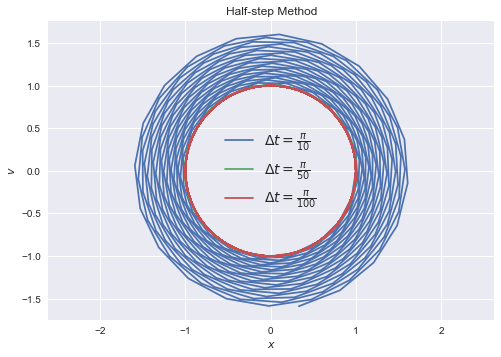

In [5]:
# SECTION 1: INITIALIZING THE VARIABLES
#------------------------------------------------------


# Initializing different timesteps in order to compare accuracies

initial_time = 0
final_time = 40 * np.pi
timestep_1 = np.pi / 10
timestep_2 = np.pi / 50
timestep_3 = np.pi / 100
t_1 = np.arange(initial_time, final_time, timestep_1)
t_2 = np.arange(initial_time, final_time, timestep_2)
t_3 = np.arange(initial_time, final_time, timestep_3)

y0 = (1, 0) # Initial condition y0 = (x0, v0)

# Initializing the array that we want to store our solutions in

y_1 = np.zeros((len(t_1) - 1, 2))
y_1[0][0], y_1[0][1] = y0[0], y0[1]
y_2 = np.zeros((len(t_2) - 1, 2))
y_2[0][0], y_2[0][1] = y0[0], y0[1]
y_3 = np.zeros((len(t_3) - 1, 2))
y_3[0][0], y_3[0][1] = y0[0], y0[1]

# SECTION 2: SETTING UP THE ODE AND IMPLEMENTING THE HALF-STEP METHOD
#------------------------------------------------------


for i in range(len(t_1) - 2):
    y_1[i + 1][1] = - timestep_1 / 2 * y_1[i][0] + y_1[i][1]
    y_1[i + 1][0] = y_1[i][0] + timestep_1 / 2 * y_1[i][1]
    x_half, v_half = y_1[i + 1][0], y_1[i + 1][1]
    y_1[i + 1][1] = - timestep_1 * x_half + y_1[i][1]
    y_1[i + 1][0] = y_1[i][0] + timestep_1 * v_half
for i in range(len(t_2) - 2):
    y_2[i + 1][1] = - timestep_2 / 2 * y_2[i][0] + y_2[i][1]
    y_2[i + 1][0] = y_2[i][0] + timestep_2 / 2 * y_2[i][1]
    x_half, v_half = y_2[i + 1][0], y_2[i + 1][1]
    y_2[i + 1][1] = - timestep_2 * x_half + y_2[i][1]
    y_2[i + 1][0] = y_2[i][0] + timestep_2 * v_half
for i in range(len(t_3) - 2):
    y_3[i + 1][1] = - timestep_3 / 2 * y_3[i][0] + y_3[i][1]
    y_3[i + 1][0] = y_3[i][0] + timestep_3 / 2 * y_3[i][1]
    x_half, v_half = y_3[i + 1][0], y_3[i + 1][1]
    y_3[i + 1][1] = - timestep_3 * x_half + y_3[i][1]
    y_3[i + 1][0] = y_3[i][0] + timestep_3 * v_half
   
# SECTION 3: PLOTTING THE RESULT
#------------------------------------------------------


plt.style.use("seaborn")
plt.plot(y_1[:,0], y_1[:,1], label=r"$ \Delta t = \frac{\pi}{10} $")
plt.plot(y_2[:,0], y_2[:,1], label=r"$ \Delta t = \frac{\pi}{50} $")
plt.plot(y_3[:,0], y_3[:,1], label=r"$ \Delta t = \frac{\pi}{100} $")
plt.title("Half-step Method")
plt.axis("equal")
plt.xlabel(r"$ x $")
plt.ylabel(r"$ v $")
plt.legend(fontsize=14)
plt.show()

As you can see for the $\frac{\pi}{10}$ timestep our solution diverged very badly. This method, although a second order method, is not very good for large timesteps so if we want to use large timesteps the midpoint method is a much better choice.


## Velocity Verlet Method

Velocity Verlet Method is a method for solving a second order ODE of the form $\frac{d^2 x}{{dt}^2}=f(x(t);t)$. It is mainly used for solving Newton's Second Law. First, it calculates $x_{n+1}$. Then, it calculates $a_{n+1}$ and finally it calculates $v_{n+1}$.

\begin{equation}
    a_n = f(x_n;t_n),
\end{equation}

\begin{equation}
    x_{n+1} = x_n + v_n \Delta t + a_n \frac{{\Delta t}^2}{2},
\end{equation}

\begin{equation}
    a_{n+1} = f(x_{n+1};t_n+ \Delta t).
\end{equation}

\begin{equation}
    v_{n+1} = v_n + \frac{a_n + a_{n+1}}{2}\Delta t.
\end{equation}

As you can see, it uses Midpoint Method for calculating the velocity in the next step but calculates the position in next step with second order accuracy instead of the first order accuracy normally used in Midpoint Method.

### Python Code


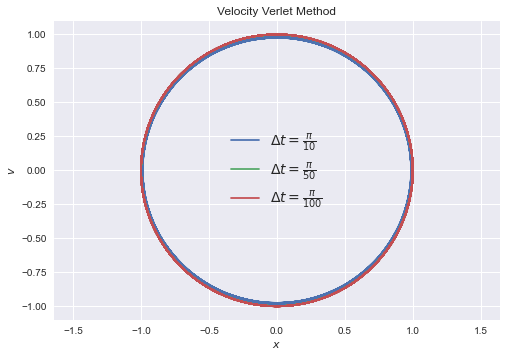

In [6]:
# SECTION 1: INITIALIZING THE VARIABLES
#------------------------------------------------------


# Initializing different timesteps in order to compare accuracies

initial_time = 0
final_time = 40 * np.pi
timestep_1 = np.pi / 10
timestep_2 = np.pi / 50
timestep_3 = np.pi / 100
t_1 = np.arange(initial_time, final_time, timestep_1)
t_2 = np.arange(initial_time, final_time, timestep_2)
t_3 = np.arange(initial_time, final_time, timestep_3)

y0 = (1, 0) # Initial condition y0 = (x0, v0)

# Initializing the array that we want to store our solutions in

y_1 = np.zeros((len(t_1) - 1, 2))
y_1[0][0], y_1[0][1] = y0[0], y0[1]
y_2 = np.zeros((len(t_2) - 1, 2))
y_2[0][0], y_2[0][1] = y0[0], y0[1]
y_3 = np.zeros((len(t_3) - 1, 2))
y_3[0][0], y_3[0][1] = y0[0], y0[1]

# SECTION 2: SETTING UP THE ODE AND IMPLEMENTING THE VELOCITY VERLET METHOD
#------------------------------------------------------


for i in range(len(t_1) - 2):
    y_1[i + 1][0] = y_1[i][0] + y_1[i][1] * timestep_1 - y_1[i][0] * timestep_1 * timestep_1 / 2
    y_1[i + 1][1] = y_1[i][1] - y_1[i][0] * timestep_1 / 2
    y_1[i + 1][1] -= y_1[i + 1][0] * timestep_1 / 2 
for i in range(len(t_2) - 2):
    y_2[i + 1][0] = y_2[i][0] + y_2[i][1] * timestep_2 - y_2[i][0] * timestep_2 * timestep_2 / 2
    y_2[i + 1][1] = y_2[i][1] - y_2[i][0] * timestep_2 / 2
    y_2[i + 1][1] -= y_2[i + 1][0] * timestep_2 / 2 
for i in range(len(t_3) - 2):
    y_3[i + 1][0] = y_3[i][0] + y_3[i][1] * timestep_3 - y_3[i][0] * timestep_3 * timestep_3 / 2
    y_3[i + 1][1] = y_3[i][1] - y_3[i][0] * timestep_3 / 2
    y_3[i + 1][1] -= y_3[i + 1][0] * timestep_3 / 2 

# SECTION 3: PLOTTING THE RESULT
#------------------------------------------------------


plt.style.use("seaborn")
plt.plot(y_1[:,0], y_1[:,1], label=r"$ \Delta t = \frac{\pi}{10} $")
plt.plot(y_2[:,0], y_2[:,1], label=r"$ \Delta t = \frac{\pi}{50} $")
plt.plot(y_3[:,0], y_3[:,1], label=r"$ \Delta t = \frac{\pi}{100} $")
plt.title("Velocity Verlet Method")
plt.axis("equal")
plt.xlabel(r"$ x $")
plt.ylabel(r"$ v $")
plt.legend(fontsize=14)
plt.show()

We used the same timestep as before and our solution is stable here as well. We can conclude that a first order method like Euler's Method cannot provide a stable solution and second order methods should be used in order to get a stable solution with bigger timesteps.


## Second Order Runge-Kutta Methods

Second order Runge-Kutta Method is a general second order method. It uses a weighed average of different slopes in order to calculate the actual slope. The general form of Runge-Kutta Method is written below:

\begin{equation}
    k_1 = f(x_n;t_n)\Delta t,
\end{equation}

\begin{equation}
    k_2 = f(x_n + \alpha k_1; t_n + \beta\Delta t)\Delta t,
\end{equation}

\begin{equation}\label{eq:2nd_order_Runge_Kutta_Method}
    x_{n+1} = x_n + a k_1 + b k_2.
\end{equation}

We cannot use any value for these parameters. We now derive the relationship between the parameters. first we taylor expand $x_{n+1}=x(t + \Delta t)$ to second order and $f(x(t) + \alpha k_1; t + \beta\Delta t)$ to first order:

\begin{equation}\label{eq:taylor_expansion_of_x}
    \begin{split}
        x(t + \Delta t) &= x(t) + \frac{dx}{dt} \Delta t + \frac{d^2 x}{{dt}^2}\frac{{\Delta t}^2}{2} + \mathscr{O}({\Delta t}^3) \\ &= x(t) + f(x(t);t) \Delta t + \frac{df}{dt} \frac{{\Delta t}^2}{2} + \mathscr{O}({\Delta t}^3) \\ &= x(t) + f(x(t);t) \Delta t + (\frac{\partial f}{\partial t} + \frac{\partial f}{\partial x}\frac{dx}{dt}) \frac{{\Delta t}^2}{2} + \mathscr{O}({\Delta t}^3) \\ &= x(t) + f(x(t);t) \Delta t + (\frac{\partial f}{\partial t} + \frac{\partial f}{\partial x}f(x(t);t)) \frac{{\Delta t}^2}{2} + \mathscr{O}({\Delta t}^3),
    \end{split}
\end{equation}

\begin{equation}\label{eq:taylor_expansion_of_f}
    f(x(t) + \alpha k_1; t + \beta\Delta t) = f(x(t);t) + \frac{\partial f}{\partial x}\frac{dx}{dt}\alpha k_1  + \frac{\partial f}{\partial t}\beta\Delta t + \mathscr{O}({\Delta t}^2).
\end{equation}

Substituting \ref{eq:taylor_expansion_of_f} into $k_2$ and comparing \ref{eq:taylor_expansion_of_x} and \ref{eq:2nd_order_Runge_Kutta_Method} we have:

\begin{equation}
    x_{n+1} = x_n + (a + b)f(x_n;t_n)\Delta t + (\alpha b \frac{\partial f}{\partial x}f(x_n;t_n) + \beta b \frac{\partial f}{\partial t}){\Delta t}^2,
\end{equation}

\begin{equation}\label{eq:relationship_between_parameters}
    \left\{
    \begin{array}{l}
        a + b = 1\\
        \alpha b = \frac{1}{2} \\
        \beta b = \frac{1}{2}
    \end{array}
    \right..
\end{equation}

Any $a$, $b$, $\alpha$, and $\beta$ that satisfy \ref{eq:relationship_between_parameters} can be used. Some special cases:

- if $\alpha=\beta=1$ and $a=b\frac{1}{2}$ we will get \ref{eq:midpoint_method}
- if $\alpha=\beta=\frac{1}{2}$, $b=1$ and $a=0$ we will get \ref{eq:half_step_method}